<center> <h1 style="background-color:Yellow; color:BLACK"><br>Monthly Internship Program For Professionals @Coders Ready<br></h1></center>
<center> <h2 style="background-color:Red; color:BLACK"><br>Vaishnavi Gadekar (Trainee Coder @ Coders Ready), Batch- Sept 2022<br></h2></center>

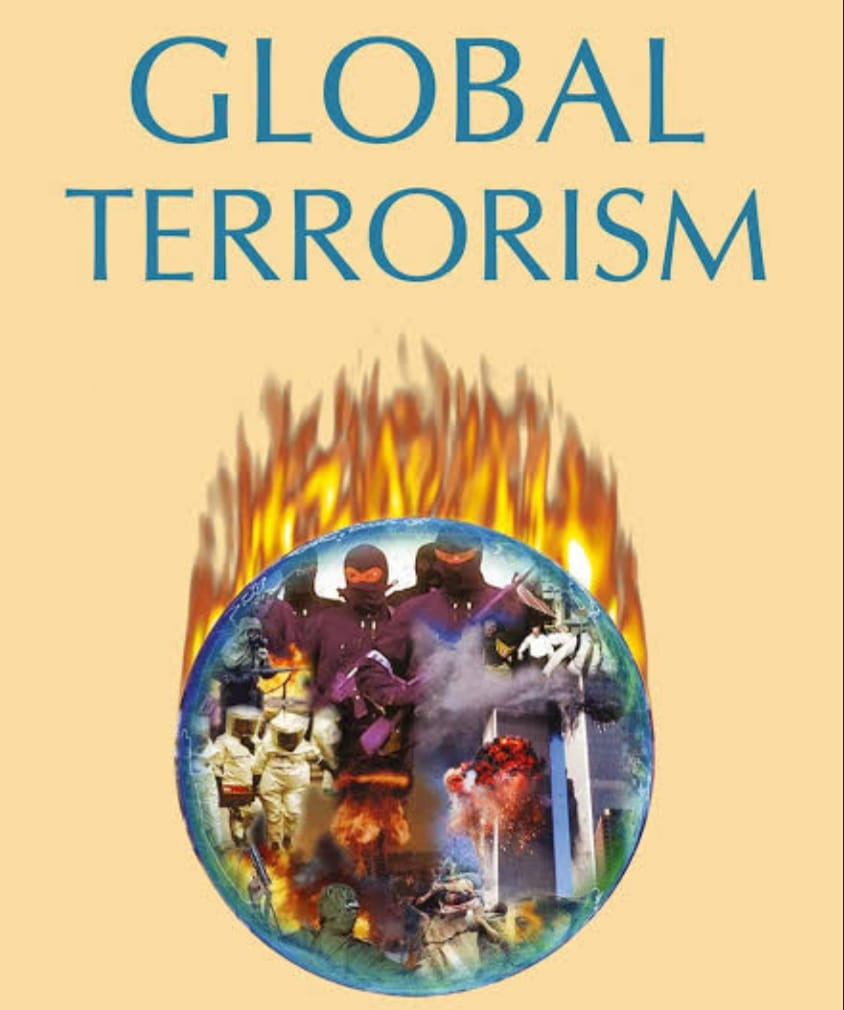

# Table of Content

1. Introduction
2. Data Cleaning
3. Data Exploration
  - Number of Terrorist Attacks Each Year
  
  - Terrorist Attacks By Region
  
  - Number of Terrorist Attacks By Country
  
  - Cities With The Most Terrorist Attacks
  
  - Terrorist Attack Types
  
  - Terrorist Weapon Types
  
  - Terrorist Targets
  
  - Largest Terrorist Groups

# `Variables of interest mainly used in this EDA:`

1) iyear: This field contains the year in which the incident occurred.

2) imonth: This field contains the month in which the incident occurred.

3) iday: This field contains the day in which the incident occurred.

4) country_txt: This field identifies the country or location where the incident occurred (categorical).

5) region_txt: This field identifies the region in which the incident occurred(categorical).

6) provstate: This variable records the name (at the time of event) of the 1st order subnational administrative region in which the event occurs.

7) city: This field contains the name of the city, village, or town in which the incident occurred.

8) attacktype1_txt: 1:Assassination 2:Hijacking 3:Kidnapping 4:Barricade Incident 5:Bombing/Explosion 6:Armed Assault 7:Unarmed Assault 8:Facility/Infrastructure Attack 9:Unknown.

9) targtype1_txt: Names of targtype1.

10) targsubtype1_txt: Names of targsubtype1.

11) gname: This field contains the name of the group that carried out the attack.

12) weaptype1_txt: Names of weaptype1.


In [2]:
#importing required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
#importing Data:
file =('GT data.csv')
df= pd.read_csv(file,encoding="ISO-8859-1")
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


# `Data Cleaning:`

In [4]:
df.shape

(181691, 135)

In [5]:
#Creating new dataframe containg columns(12-mentioned in 'About the dataset' section) which we are mainly going to use in this analysis among total 135 columns:
dict={
    'Year':df['iyear'],
    'Country':df['country_txt'],
    'Region':df['region_txt'],
    'State':df['provstate'],
    'City':df['city'],
    'Attack_type':df['attacktype1_txt'],
    'Target_type':df['targtype1_txt'],
    'Target_subtype':df['targsubtype1_txt'],
    'Gang_name':df['gname'],
    'Weapon_type':df['weaptype1_txt'],
    'Kill':df['nkill'],
    'Wound':df['nwound']
}
Data=pd.DataFrame(dict)
Data.head()

,Year,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,Kill,Wound
0,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,1.0,0.0
1,1970,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0,0.0
2,1970,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0,0.0
3,1970,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,NaN,NaN
4,1970,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,NaN,NaN


In [6]:
#Checking shape of new dataframe i.e Data:
Data.shape

(181691, 12)

In [7]:
#Finding out number of null values in each column:
Data.isnull().sum()

Year                  0
Country               0
Region                0
State               421
City                434
Attack_type           0
Target_type           0
Target_subtype    10373
Gang_name             0
Weapon_type           0
Kill              10313
Wound             16311
dtype: int64

In [8]:
#Filling Null values in 'Target_subtype' column as 'others':
Data['Target_subtype'] = Data['Target_subtype'].fillna('others')

#Filling Null values in 'City' column as 'Unknown':
Data['City']=Data['City'].fillna('Unknown')

#Filling Null values in 'State' column as 'Unknown':
Data['State']=Data['State'].fillna('Unknown')

#Filling Null values in 'Kill' column as 0:
Data['Kill']=Data['Kill'].fillna(0)

#Filling Null values in 'Wound' column as 0:
Data['Wound']=Data['Wound'].fillna(0)

In [9]:
#Checking for null values:
Data.isnull().sum()

Year              0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
Kill              0
Wound             0
dtype: int64

## Now there are no null values present in new dataframe i.e Data.

# `Analysis of Dataset:`

In [10]:
#Information about the dataset:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Country         181691 non-null  object 
 2   Region          181691 non-null  object 
 3   State           181691 non-null  object 
 4   City            181691 non-null  object 
 5   Attack_type     181691 non-null  object 
 6   Target_type     181691 non-null  object 
 7   Target_subtype  181691 non-null  object 
 8   Gang_name       181691 non-null  object 
 9   Weapon_type     181691 non-null  object 
 10  Kill            181691 non-null  float64
 11  Wound           181691 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 16.6+ MB


In [11]:
#statistical description of the dataset:
Data.describe()

,Year,Kill,Wound
count,181691.000000,181691.000000,181691.000000
mean,2002.638997,2.266860,2.883296
std,13.259430,11.227057,34.309747
min,1970.000000,0.000000,0.000000
25%,1991.000000,0.000000,0.000000
50%,2009.000000,0.000000,0.000000
75%,2014.000000,2.000000,2.000000
max,2017.000000,1570.000000,8191.000000


In [12]:
#Finding out how many countries data is given in this dataset:
Countries=Data['Country'].unique()
Countries

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [13]:
print("Total {} countries were noted in the data.".format(len(Countries)))

Total 205 countries were noted in the data.


In [14]:
#Top 10 countries affected by terrorism:
print(Data['Country'].value_counts().head(10))

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


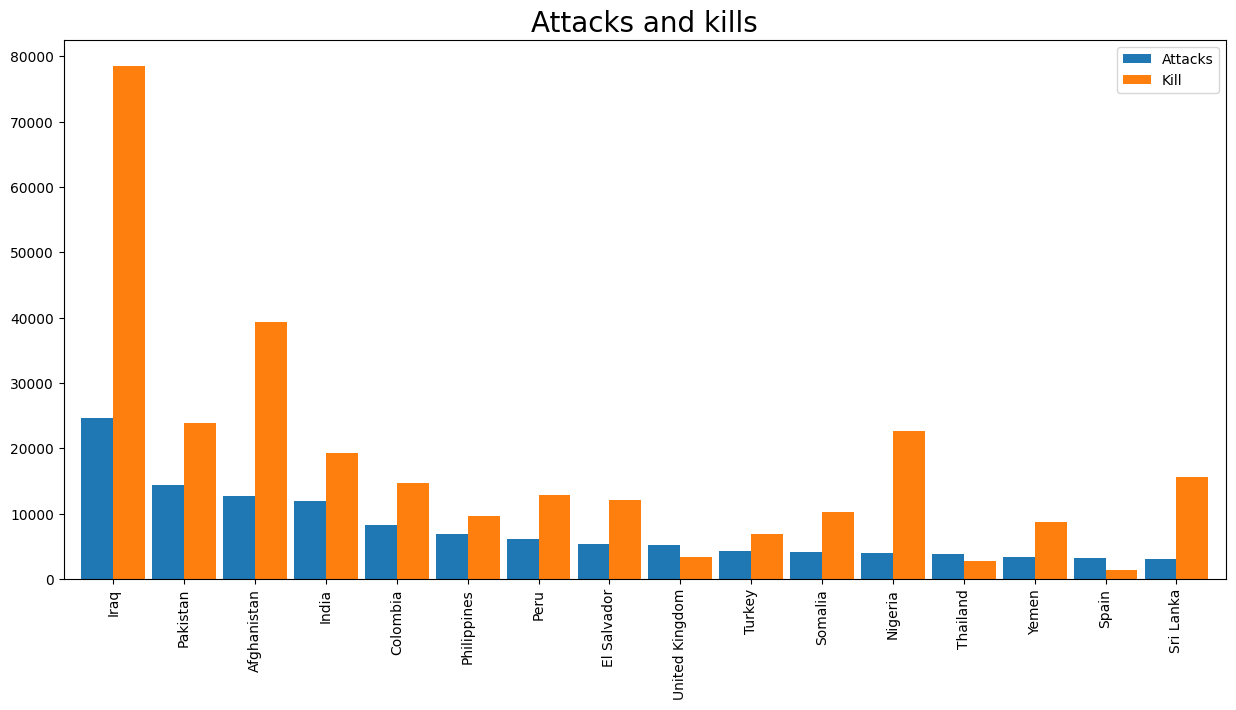

In [15]:
count_terror = Data['Country'].value_counts()[:16].to_frame()
count_terror.columns=['Attacks']
count_kill=Data.groupby ('Country')['Kill'].sum().to_frame()
count_terror.merge(count_kill,left_index = True,right_index =True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
plt.title("Attacks and kills", fontsize=20)
fig.set_size_inches(15,7)
plt.show()

### Iraq has the highest number of terrorist attacks and kills than all other countries followed by Pakistan, Afghanistan and India.

In [16]:
#Finding out how many regions data is given in this dataset:
Region=Data['Region'].unique()
print(Region)

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


In [17]:
print("Total {} regions were noted in the data.".format(len(Region)))

Total 12 regions were noted in the data.


In [18]:
#Regions affected by terrorism:
region_dict=Data['Region'].value_counts().to_dict()
region_dict

{'Middle East & North Africa': 50474,
 'South Asia': 44974,
 'South America': 18978,
 'Sub-Saharan Africa': 17550,
 'Western Europe': 16639,
 'Southeast Asia': 12485,
 'Central America & Caribbean': 10344,
 'Eastern Europe': 5144,
 'North America': 3456,
 'East Asia': 802,
 'Central Asia': 563,
 'Australasia & Oceania': 282}

In [19]:
region_dict=Data['Region'].value_counts().to_dict()
region_dict

{'Middle East & North Africa': 50474,
 'South Asia': 44974,
 'South America': 18978,
 'Sub-Saharan Africa': 17550,
 'Western Europe': 16639,
 'Southeast Asia': 12485,
 'Central America & Caribbean': 10344,
 'Eastern Europe': 5144,
 'North America': 3456,
 'East Asia': 802,
 'Central Asia': 563,
 'Australasia & Oceania': 282}

## Terrorist Attacks Vs Region

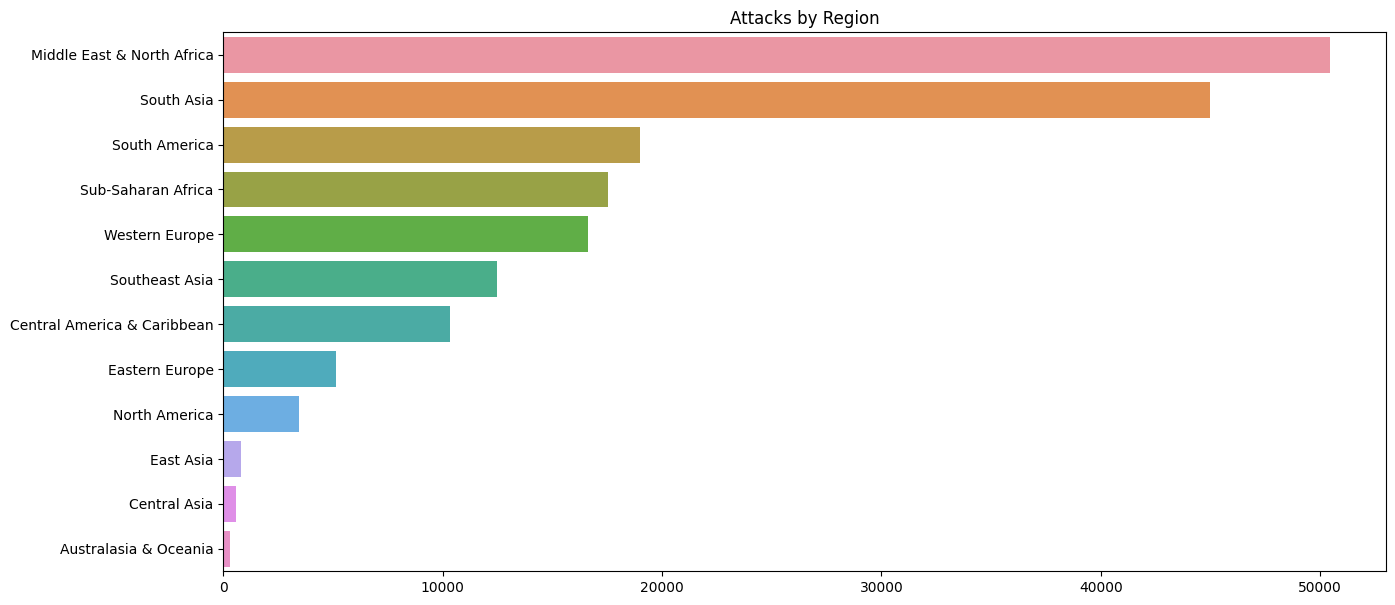

In [20]:
region= list(region_dict.keys())
r_count= list(region_dict.values())

plt.figure(figsize=(15,7));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 0)
plt.title('Attacks by Region')

sns.barplot(y=region,x=r_count);

### - The Middle East & North Africa, South Asia have the most terrorism attacks, followed by , Sub-Saharan-Africa, and South America.There is also a trend that the Western countries tend to have less terrorism attacks than the rest of the countries. It is also not surprising to see that regions like South Asia, Middle East, Africa, and South America are the top ranking in terms of terrorism attacks due to the large disparities in wealth, differences in religions, as well as territorial disputes , supramecy and superiority . 

In [21]:
#Top 5 cities affected by Terrorism:
Data['City'].value_counts().head(6)

Unknown    10209
Baghdad     7589
Karachi     2652
Lima        2359
Mosul       2265
Belfast     2171
Name: City, dtype: int64

## -Top 5 Terrorism Affected cities are Bagdad of Iraq with highest number of terrorist attack (around 7589) , followed by Karachi from Pakistan, Lima from Peru, Mosul from Iraq and Belfast from UK.

In [22]:
#Attack types used in terrorism:
attack_dict=Data['Attack_type'].value_counts().to_dict()
attack_dict

{'Bombing/Explosion': 88255,
 'Armed Assault': 42669,
 'Assassination': 19312,
 'Hostage Taking (Kidnapping)': 11158,
 'Facility/Infrastructure Attack': 10356,
 'Unknown': 7276,
 'Unarmed Assault': 1015,
 'Hostage Taking (Barricade Incident)': 991,
 'Hijacking': 659}

In [23]:
print("Total {} attack modes were used by terrorist.".format(len(attack_dict)))

Total 9 attack modes were used by terrorist.


## Terrorist Attacks Based on Attack types

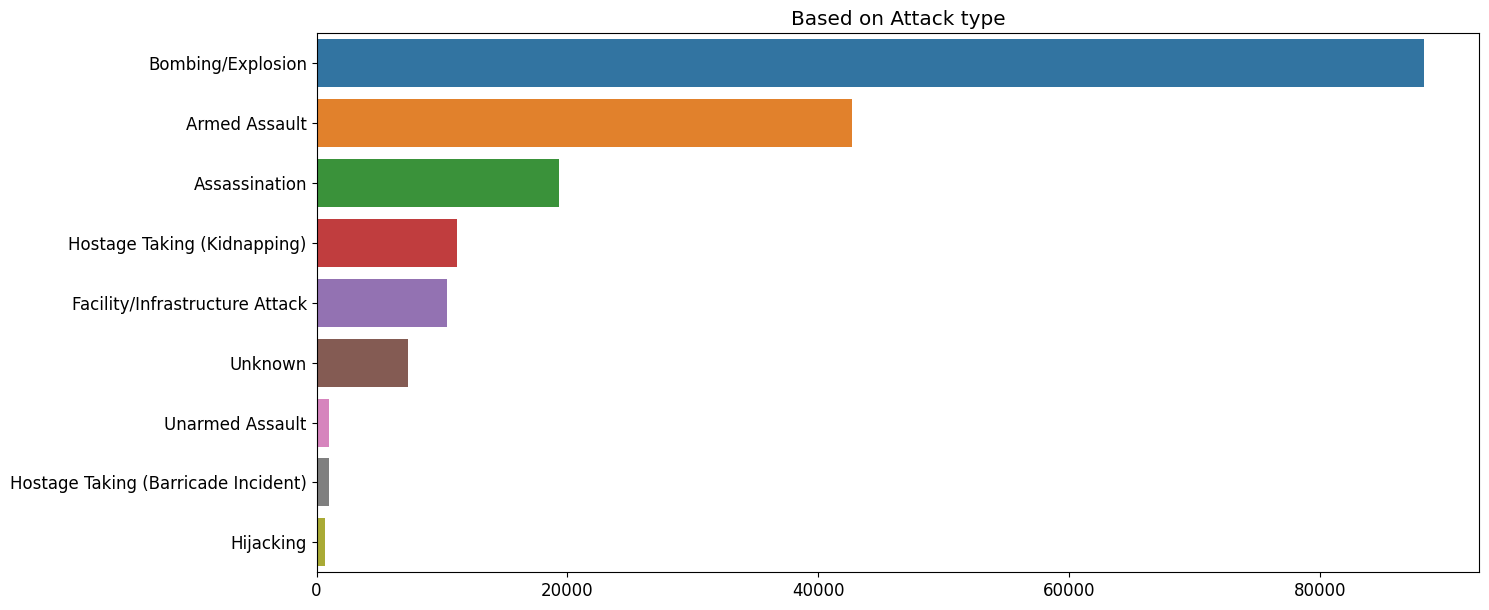

In [24]:
attack_modes=list(attack_dict.keys())
attack_modes_count=list(attack_dict.values())
plt.figure(figsize=(15,7));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 0)
plt.title('Based on Attack type')
sns.barplot(y=attack_modes,x=attack_modes_count);

### - Bombings and Explosives are the most common type of weapon used in terrorist actacks. Because weapon are highly inexpensive and easy to make .

In [25]:
Target_type=Data['Target_type'].unique()
print(Target_type)

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [26]:
print("Terrorist mostly have {} targets.".format(len(Target_type)))

Terrorist mostly have 22 targets.


In [27]:
#Top 5 choosen attacking targets of terrorists:
target_dict= Data['Target_type'].value_counts().to_dict()
target_dict

{'Private Citizens & Property': 43511,
 'Military': 27984,
 'Police': 24506,
 'Government (General)': 21283,
 'Business': 20669,
 'Transportation': 6799,
 'Utilities': 6023,
 'Unknown': 5898,
 'Religious Figures/Institutions': 4440,
 'Educational Institution': 4322,
 'Government (Diplomatic)': 3573,
 'Terrorists/Non-State Militia': 3039,
 'Journalists & Media': 2948,
 'Violent Political Party': 1866,
 'Airports & Aircraft': 1343,
 'Telecommunication': 1009,
 'NGO': 970,
 'Tourists': 440,
 'Maritime': 351,
 'Food or Water Supply': 317,
 'Abortion Related': 263,
 'Other': 137}

## Terrorist attacks Vs Target Type

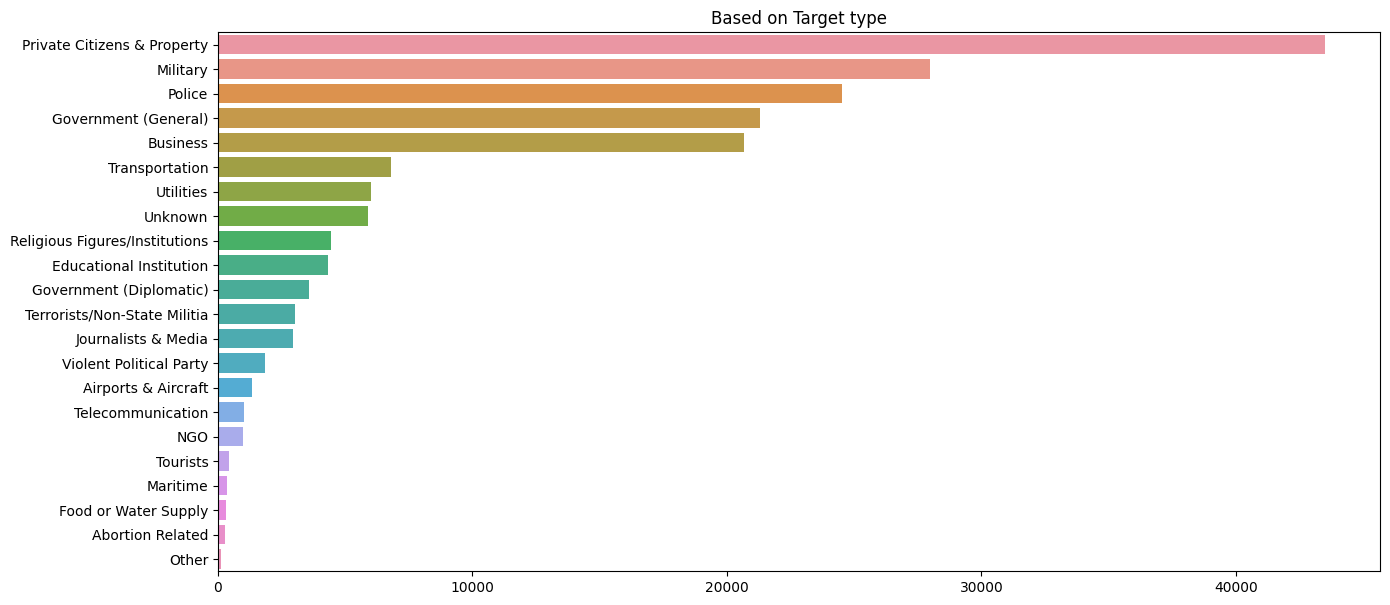

In [28]:
target=list(target_dict.keys())
target_count=list(target_dict.values())

plt.figure(figsize=(15,7));
plt.rcParams.update({'font.size':10});
plt.title('Based on Target type')

sns.barplot(y=target,x=target_count);

### - Private properties and citizens are likely to be targeted by terrorists followed by the military, police and business.

In [29]:
#Finding out how many gangs are involved in terrorism and which are they:
Gang_name=Data['Gang_name'].unique()
print(Gang_name)

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']


In [30]:
print("Total {} terrorist gangs are active all around the world.".format(len(Gang_name)))

Total 3537 terrorist gangs are active all around the world.


In [31]:
#most dangerous and leading top 5 gangs involed in terrorism:
Data['Gang_name'].value_counts().head(5)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Gang_name, dtype: int64

## - As we can see that Taliban has been responsible for around 80 thousand terror attacks making it most active terrorist group, followed by Islamic State of Iraq and the Levant (ISIL), also known as ISIS, which is responsible for around 6 thousand attacks.`

## Terrorist Attacks Year wise

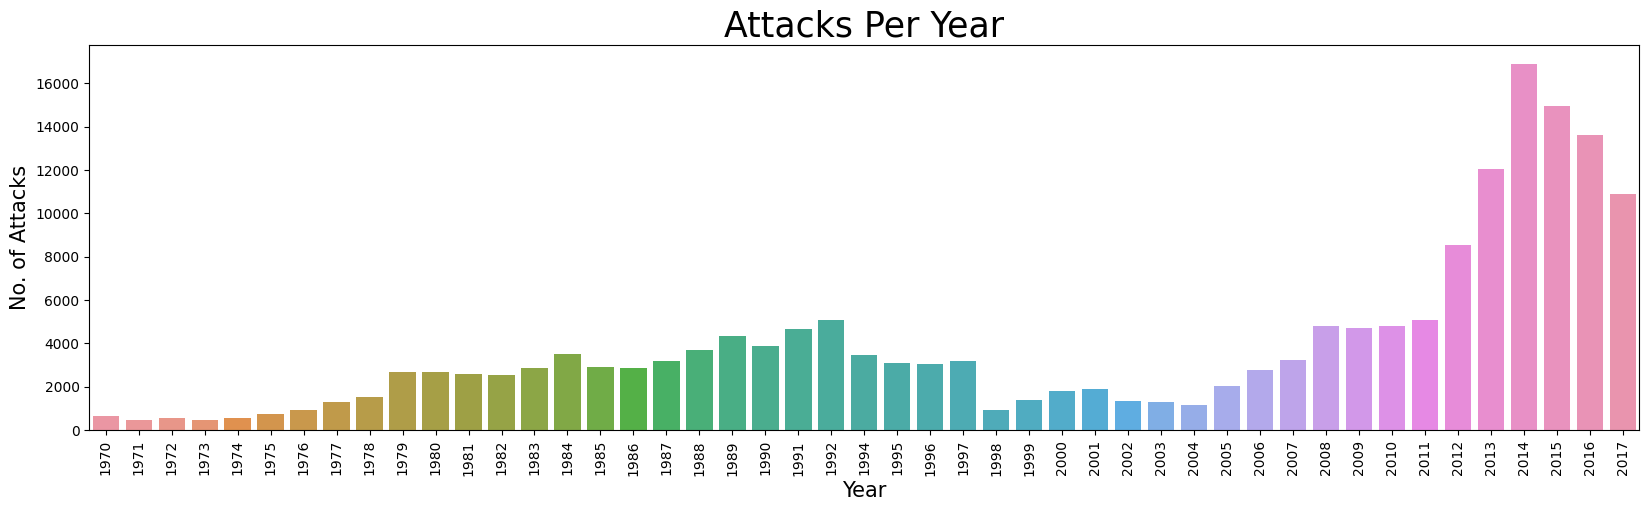

In [32]:
plt.figure(figsize=(20,5))
plt.title('Attacks Per Year',fontsize=25)
sns.countplot(x=Data.Year);
plt.xticks(rotation=90);
plt.xlabel('Year',fontsize=15)
plt.ylabel('No. of Attacks',fontsize=15);

### - There is a huge increase in terrorist Attacks from 2011 and year 2014 has the huge increase in Terrorist Attacks ,after 2014 Terrorist attacks goes on decreasing .

# `Results and Insights:`

- Increase in global terrorist attacks after the year 2000, with the most terrorist attacks happening in 2014.

- South Asia and Middle East & North Africa had the most terrorist attacks with a total of 35,000 and 28,445 attacks from 1970-2017.

- Countries with the most terrorist attacks are India (10.5k), Afghanistan (10.1k), and Pakistan (9.8k).

- Cities with the most terrorist attacks were Belfast (961), Baghdad (820), and Kurachi (801).

- Most popular weapon used in attacks were bombings/explosions (41.2%), followed by armed assault (26%), and assassinations (12.2%).

- Terrorist targets were mainly citizens & their property, private citizens, and government general.

- Largest terrorist organizations are the Taliban, Islamic State of Iraq and the Levant (ISIL), and Shining Path (SL).

- The mostly likely type of terrorist in the United States is someone who would target a business through bombing and are most likely to be an anti-abortion extremeist


## India's Stand to achieve self sufficiency in Defence sector

- According to the Stockholm Peace Research Institute(SIPRI) India ranks 3rd after America and China in the total expenditure on Defence Weapons/equipments.
- India ranks 4th in term of Production of weapons.


# References:

1- https://www.kaggle.com/datasets/muhammetvarl/global-terrorism

2- https://medium.com/swlh/analysis-of-global-terrorism-dataset-888292e01873